In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
from scipy.signal import find_peaks, savgol_filter, detrend
from scipy.stats import pearsonr

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tools.analysis import *
from tools.outliers import MonteCarloOutliers
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.utils import shuffle

In [3]:
domain = pd.read_csv('data/domain.csv')
df = pd.read_csv('data/dataset.csv')
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
years = df['years']

X.columns = np.ravel(domain)

In [4]:
df[df['HbA1c'] <= 6.5]

,1,2,3,4,5,6,7,8,9,10,...,7461,7462,7463,7464,7465,7466,7467,7468,HbA1c,years
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040,5.80,54.0
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646,5.08,45.0
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673,4.46,34.0
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049,5.36,59.0
6,0.283905,0.284516,0.285507,0.286117,0.285742,0.284252,0.282040,0.279801,0.278184,0.277519,...,0.010203,0.010193,0.010185,0.010180,0.010180,0.010184,0.010194,0.010208,5.50,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.318715,0.313592,0.309274,0.305793,0.303204,0.301713,0.301645,0.303252,0.306504,0.310941,...,0.010810,0.010794,0.010773,0.010748,0.010721,0.010696,0.010675,0.010661,6.50,61.0
435,0.313363,0.314186,0.315543,0.317050,0.318237,0.318869,0.319107,0.319391,0.320173,0.321657,...,0.010471,0.010458,0.010449,0.010443,0.010444,0.010451,0.010464,0.010481,6.00,58.0
436,0.245106,0.247455,0.249869,0.251878,0.253053,0.253250,0.252739,0.252075,0.251839,0.252383,...,0.007608,0.007604,0.007600,0.007597,0.007597,0.007602,0.007614,0.007633,5.50,48.0
439,0.243514,0.244631,0.246306,0.248120,0.249626,0.250567,0.250970,0.251070,0.251109,0.251166,...,0.009158,0.009146,0.009125,0.009097,0.009069,0.009047,0.009036,0.009037,6.50,47.0


In [5]:
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
X.columns = np.ravel(domain)
X

,400.1635,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009078,0.009078,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009709,0.009708,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646
2,0.261524,0.264529,0.267711,0.270232,0.271406,0.271031,0.269475,0.267460,0.265697,0.264599,...,0.007980,0.007985,0.007995,0.008008,0.008024,0.008040,0.008058,0.008075,0.008092,0.008107
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007575,0.007600,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010037,0.010029,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.253261,0.254469,0.255437,0.255796,0.255311,0.254114,0.252725,0.251827,0.251964,0.253304,...,0.012096,0.012106,0.012107,0.012100,0.012086,0.012068,0.012050,0.012036,0.012028,0.012027
448,0.352318,0.352299,0.353075,0.353827,0.353893,0.353158,0.352134,0.351675,0.352509,0.354873,...,0.008853,0.008796,0.008742,0.008701,0.008674,0.008662,0.008658,0.008657,0.008654,0.008645
449,0.224357,0.223553,0.223732,0.224696,0.226143,0.227831,0.229672,0.231706,0.233981,0.236420,...,0.006502,0.006461,0.006417,0.006378,0.006347,0.006329,0.006321,0.006323,0.006330,0.006340
451,0.332913,0.333179,0.334629,0.336291,0.337391,0.337680,0.337502,0.337541,0.338393,0.340228,...,0.011321,0.011328,0.011328,0.011320,0.011305,0.011282,0.011256,0.011230,0.011207,0.011190


<Axes: >

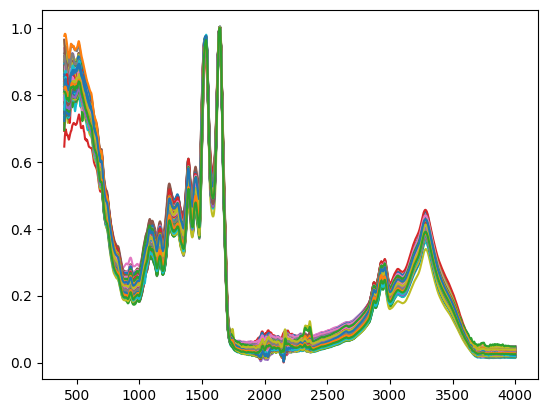

In [6]:
X = X.apply(lambda row: row / max(row.iloc[2000:]), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=50, polyorder=2, deriv=0)).T
X.T.plot(legend=False)

In [7]:
#2340 2573

<Axes: ylabel='Count'>

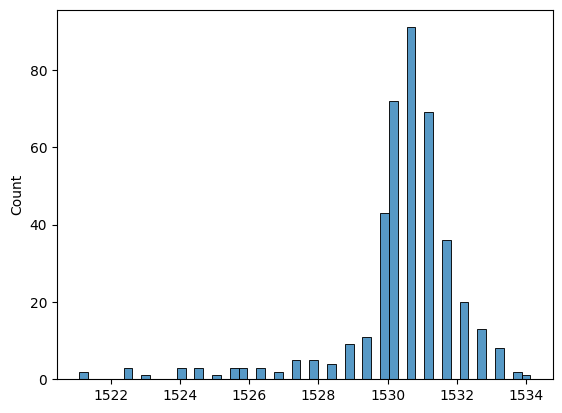

In [8]:
#np.max(X.iloc[:, 2300:2400], axis=1)
amide_b_wn = X.iloc[:, 2300:2400].idxmax(axis=1)
amide_b = X.iloc[:, 2300:2400].max(axis=1)
sns.histplot(amide_b_wn)

<Axes: ylabel='Count'>

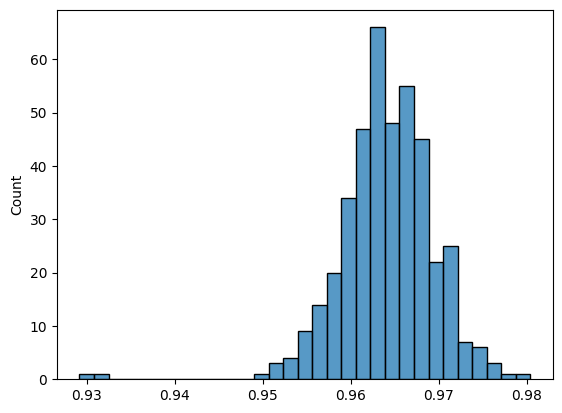

In [9]:
sns.histplot(amide_b)

<Axes: ylabel='Count'>

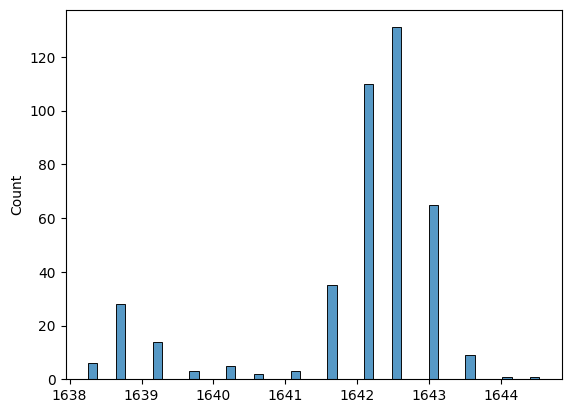

In [10]:
#np.max(X.iloc[:, 2500:2600], axis=1)
amide_a_wn = X.iloc[:, 2500:2600].idxmax(axis=1)
amide_a = X.iloc[:, 2500:2600].max(axis=1)
sns.histplot(amide_a_wn)

In [11]:
amide_ratio = amide_a / amide_b
amide_ratio

0      1.038612
1      1.039932
2      1.038593
3      1.031513
4      1.034676
         ...   
446    1.037358
448    1.033058
449    1.021953
451    1.046481
454    1.037754
Length: 413, dtype: float64

Text(3.5, 1.06, '$R = 0.313$\n$p < 0.00001$\n$y = 0.00114x + 1.03069$')

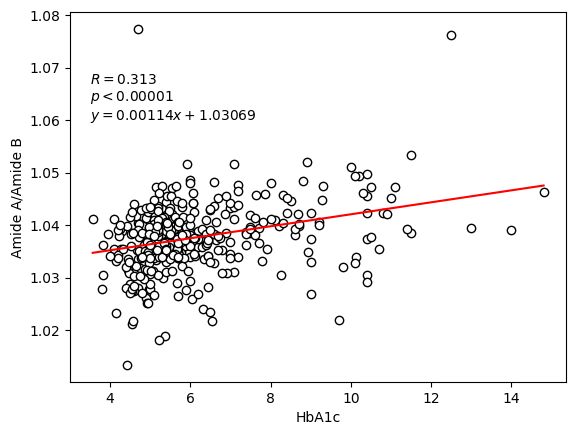

In [12]:
r, p_val = pearsonr(y, amide_ratio)

model = LinearRegression()
model.fit(y.to_numpy().reshape(-1, 1), amide_ratio)

x_range = np.linspace(min(y), max(y), 100)
predicted = model.predict(x_range.reshape(-1, 1))

if p_val < 0.00001:
    text = f"$R = {r:.3f}$\n$p < 0.00001$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
else:
    text = f"$R = {r:.3f}$\n$p = {p_val:.5f}$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
    
plt.scatter(y, amide_ratio, facecolor='w', edgecolor='k')
plt.plot(x_range, predicted, color='r', linewidth=1.5)
plt.xlabel("HbA1c")
plt.ylabel("Amide A/Amide B")
plt.text(3.5, 1.06, text)

In [13]:
def corr_plot(X, y):
    r, p_val = pearsonr(X, y)
    
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    
    x_range = np.linspace(min(X), max(X))
    predicted = model.predict(x_range.reshape(-1, 1))
    
    if p_val < 0.00001:
        text = f"$R = {r:.3f}$\n$p < 0.00001$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
    else:
        text = f"$R = {r:.3f}$\n$p = {p_val:.5f}$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
        
    plt.scatter(X, y, facecolor='w', edgecolor='k')
    plt.plot(x_range, predicted, color='r', linewidth=1.5)
    plt.xlabel("$y_1$")
    plt.ylabel("$y_2$")

    x_offset = (max(X) - min(X)) * 0.02
    y_offset = (max(y) - min(y)) * 0.02
    text_x = min(X)
    text_y = max(y)

    print(text)
    
    plt.text(text_x, text_y, text, verticalalignment='top')

In [84]:
def detrend_spectrum(spectrum, order):
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

In [105]:
#df = df[df['HbA1c'] < 10]
max_abs = df.drop(columns=['HbA1c', 'years']).apply(lambda row: True if row.max() > 0.3 else False, axis=1)
df = df[max_abs]
#df = df[df['HbA1c'] < 10]
print(len(df))

X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
years = df['years']
X.columns = np.ravel(domain)

#X = X.apply(lambda row: row / max(row.iloc[2000:]), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=60, polyorder=2, deriv=2)).T # 60 window 0.3 abs
X = X.apply(lambda row: row / np.linalg.norm(row), axis=1)
X = X.apply(lambda row: detrend_spectrum(row, 10), axis=1)
X_norm = X.apply(lambda row: row / np.linalg.norm(row), axis=1)

294


In [106]:
# X_norm.T.plot(legend=False)
# plt.xlim([1000, 1400])
# plt.ylim([-0.10, 0.10])
# plt.fill_betweenx(plt.ylim(), 1075, 1085, alpha=0.5, color='skyblue')
# plt.fill_betweenx(plt.ylim(), 1290, 1320, alpha=0.5, color='skyblue')

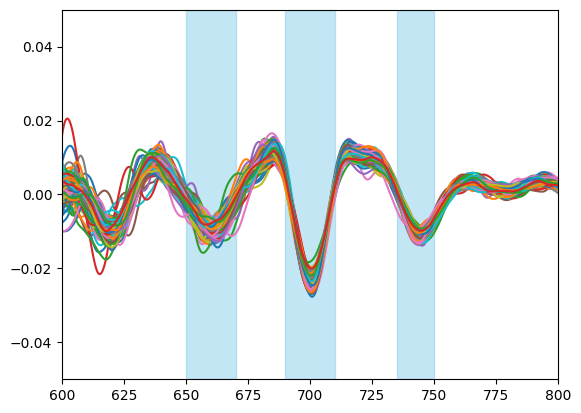

In [107]:
X_norm.T.plot(legend=False)
plt.xlim([600, 800])
plt.ylim([-0.05, 0.05])
plt.fill_betweenx(plt.ylim(), 650, 670, alpha=0.5, color='skyblue')
plt.fill_betweenx(plt.ylim(), 690, 710, alpha=0.5, color='skyblue')
plt.fill_betweenx(plt.ylim(), 735, 750, alpha=0.5, color='skyblue')

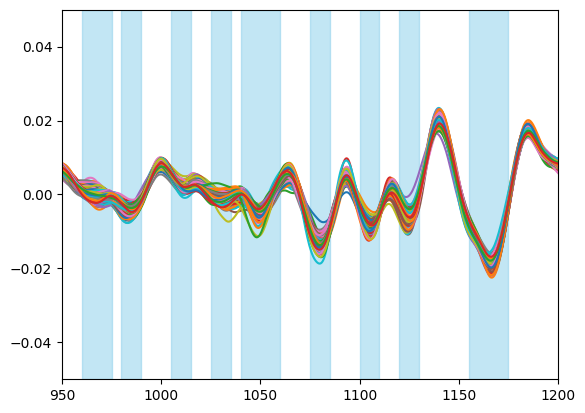

In [108]:
X_norm.T.plot(legend=False)
plt.xlim([950, 1200])
plt.ylim([-0.05, 0.05])
plt.fill_betweenx(plt.ylim(), 960, 975, alpha=0.5, color='skyblue') # 970
plt.fill_betweenx(plt.ylim(), 980, 990, alpha=0.5, color='skyblue') # 985
plt.fill_betweenx(plt.ylim(), 1005, 1015, alpha=0.5, color='skyblue') # 1030
plt.fill_betweenx(plt.ylim(), 1025, 1035, alpha=0.5, color='skyblue') # 1030
plt.fill_betweenx(plt.ylim(), 1040, 1060, alpha=0.5, color='skyblue') # 1050
plt.fill_betweenx(plt.ylim(), 1075, 1085, alpha=0.5, color='skyblue') # 1080
plt.fill_betweenx(plt.ylim(), 1120, 1130, alpha=0.5, color='skyblue') # 1125
plt.fill_betweenx(plt.ylim(), 1100, 1110, alpha=0.5, color='skyblue') # 1115
plt.fill_betweenx(plt.ylim(), 1155, 1175, alpha=0.5, color='skyblue') # 1160

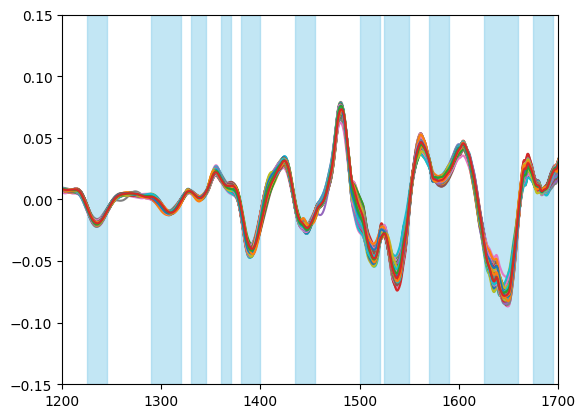

In [109]:
X_norm.T.plot(legend=False)
plt.xlim([1200, 1700])
plt.ylim([-0.15, 0.15])
plt.fill_betweenx(plt.ylim(), 1225, 1245, alpha=0.5, color='skyblue') # 1235
plt.fill_betweenx(plt.ylim(), 1290, 1320, alpha=0.5, color='skyblue') # 1300
plt.fill_betweenx(plt.ylim(), 1330, 1345, alpha=0.5, color='skyblue') # 1335
plt.fill_betweenx(plt.ylim(), 1360, 1370, alpha=0.5, color='skyblue') # 1365
plt.fill_betweenx(plt.ylim(), 1380, 1400, alpha=0.5, color='skyblue') # 1390
plt.fill_betweenx(plt.ylim(), 1435, 1455, alpha=0.5, color='skyblue') # 1440
plt.fill_betweenx(plt.ylim(), 1500, 1520, alpha=0.5, color='skyblue') # 1510
plt.fill_betweenx(plt.ylim(), 1525, 1550, alpha=0.5, color='skyblue') # amide 2
plt.fill_betweenx(plt.ylim(), 1570, 1590, alpha=0.5, color='skyblue') # 1580
plt.fill_betweenx(plt.ylim(), 1625, 1660, alpha=0.5, color='skyblue') # amide 1
plt.fill_betweenx(plt.ylim(), 1675, 1695, alpha=0.5, color='skyblue') # 1680

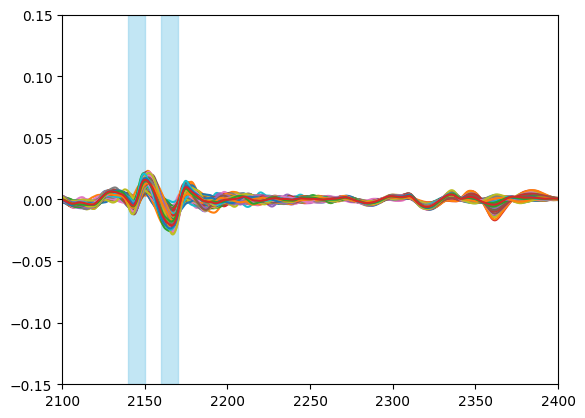

In [110]:
X_norm.T.plot(legend=False)
plt.xlim([2100, 2400])
plt.ylim([-0.15, 0.15])
plt.fill_betweenx(plt.ylim(), 2140, 2150, alpha=0.5, color='skyblue') # 2140
plt.fill_betweenx(plt.ylim(), 2160, 2170, alpha=0.5, color='skyblue') # 2160

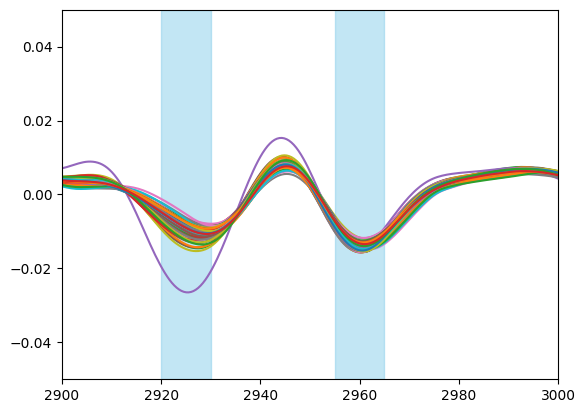

In [111]:
X_norm.T.plot(legend=False)
plt.xlim([2900, 3000])
plt.ylim([-0.05, 0.05])
plt.fill_betweenx(plt.ylim(), 2920, 2930, alpha=0.5, color='skyblue')
plt.fill_betweenx(plt.ylim(), 2955, 2965, alpha=0.5, color='skyblue')

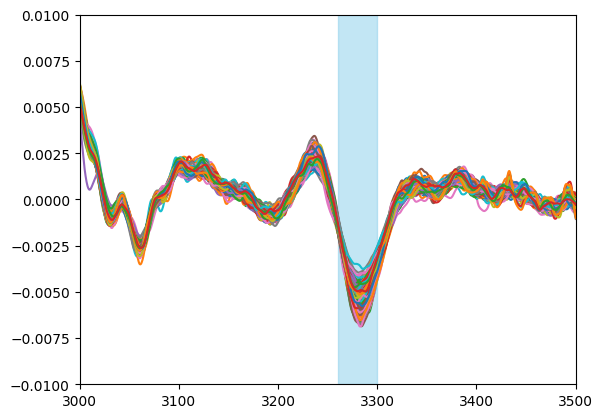

In [112]:
X_norm.T.plot(legend=False)
plt.xlim([3000, 3500])
plt.ylim([-0.01, 0.01])
plt.fill_betweenx(plt.ylim(), 3260, 3300, alpha=0.5, color='skyblue') # 3290

In [113]:
amide_2 = X.iloc[:, (X.columns > 1525) & (X.columns < 1560)].min(axis=1) # Alone is not significant
amide_1 = X.iloc[:, (X.columns > 1625) & (X.columns < 1660)].min(axis=1) # p = 0.003 # amide_1 / amide_2 -> p = 0.00002
peak_660 = X.iloc[:, (X.columns > 650) & (X.columns < 670)].min(axis=1) # NS
peak_700 = X.iloc[:, (X.columns > 690) & (X.columns < 710)].min(axis=1) # NS
peak_740 = X.iloc[:, (X.columns > 735) & (X.columns < 750)].min(axis=1) # NS
peak_970 = X.iloc[:, (X.columns > 960) & (X.columns < 975)].min(axis=1) 
peak_1030 = X.iloc[:, (X.columns > 1025) & (X.columns < 1035)].min(axis=1) # p < 0.00001
peak_1050 = X.iloc[:, (X.columns > 1040) & (X.columns < 1060)].min(axis=1) # NS
peak_1080 = X.iloc[:, (X.columns > 1075) & (X.columns < 1085)].min(axis=1) # p < 0.00001
peak_1115 = X.iloc[:, (X.columns > 1100) & (X.columns < 1110)].min(axis=1) # p < 0.00001
peak_1125 = X.iloc[:, (X.columns > 1120) & (X.columns < 1130)].min(axis=1) # p < 0.00001
peak_1160 = X.iloc[:, (X.columns > 1155) & (X.columns < 1165)].min(axis=1) # p < 0.00001
peak_1235 = X.iloc[:, (X.columns > 1225) & (X.columns < 1245)].min(axis=1) # p = 0.00009
peak_1300 = X.iloc[:, (X.columns > 1290) & (X.columns < 1320)].min(axis=1) # p = 0.00027
peak_1335 = X.iloc[:, (X.columns > 1330) & (X.columns < 1340)].min(axis=1) # p < 0.00001
peak_1365 = X.iloc[:, (X.columns > 1360) & (X.columns < 1370)].min(axis=1) # p < 0.00001
peak_1390 = X.iloc[:, (X.columns > 1380) & (X.columns < 1400)].min(axis=1) # p = 0.00551
peak_1440 = X.iloc[:, (X.columns > 1435) & (X.columns < 1455)].min(axis=1) # p < 0.00001
peak_1510 = X.iloc[:, (X.columns > 1500) & (X.columns < 1520)].min(axis=1) # p = 0.00328
peak_1580 = X.iloc[:, (X.columns > 1570) & (X.columns < 1590)].min(axis=1) # p < 0.00001
peak_1680 = X.iloc[:, (X.columns > 1675) & (X.columns < 1695)].min(axis=1) # NS
peak_2140 = X.iloc[:, (X.columns > 2140) & (X.columns < 2150)].min(axis=1) #
peak_2160 = X.iloc[:, (X.columns > 2160) & (X.columns < 2170)].min(axis=1) # p < 0.00001
peak_2920 = X.iloc[:, (X.columns > 2920) & (X.columns < 2930)].min(axis=1) # p = 0.00023
peak_2960 = X.iloc[:, (X.columns > 2955) & (X.columns < 2965)].min(axis=1) # p < 0.00001'
peak_3290 = X.iloc[:, (X.columns > 3260) & (X.columns < 3300)].min(axis=1)

lower_1480 = X.iloc[:, (X.columns > 1470) & (X.columns < 1490)].max(axis=1)

variables_list = [
    amide_2,
    amide_1,
    peak_1030,
    peak_1050,
    peak_1080,
    peak_1115,
    peak_1125,
    peak_1160,
    peak_1235,
    peak_1300,
    peak_1335,
    peak_1365,
    peak_1390,
    peak_1440,
    peak_1510,
    peak_1580,
    peak_2160,
    peak_2920,
    peak_2960
]

variable_names = [
    'amide_2',
    'amide_1',
    'peak_1030',
    'peak_1050',
    'peak_1080',
    'peak_1115',
    'peak_1125',
    'peak_1160',
    'peak_1235',
    'peak_1300',
    'peak_1335',
    'peak_1365',
    'peak_1390',
    'peak_1440',
    'peak_1510',
    'peak_1580',
    'peak_2160',
    'peak_2920',
    'peak_2960'
]

$R = 0.215$
$p = 0.00021$
$y = 0.00052x + -0.06442$


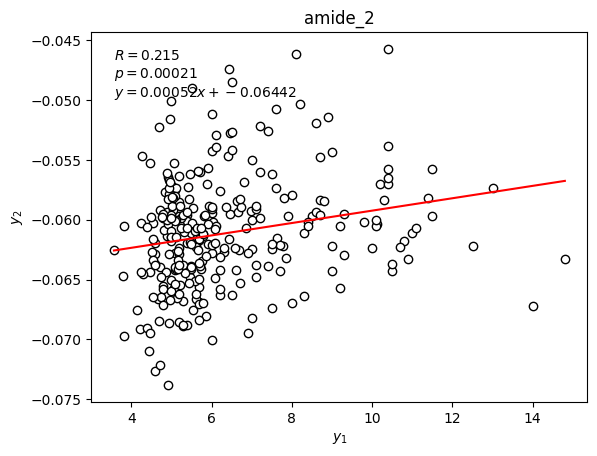

$R = 0.029$
$p = 0.61765$
$y = 0.00005x + -0.07860$


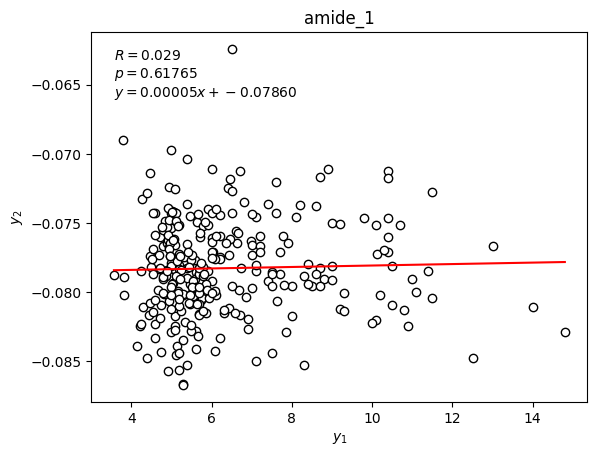

$R = -0.272$
$p < 0.00001$
$y = -0.00017x + 0.00005$


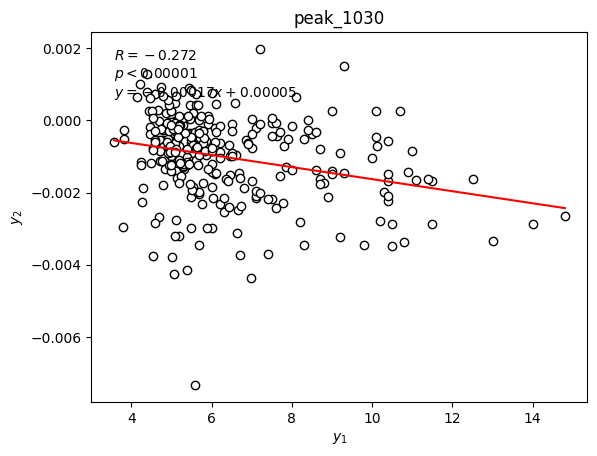

$R = 0.154$
$p = 0.00797$
$y = 0.00009x + -0.00568$


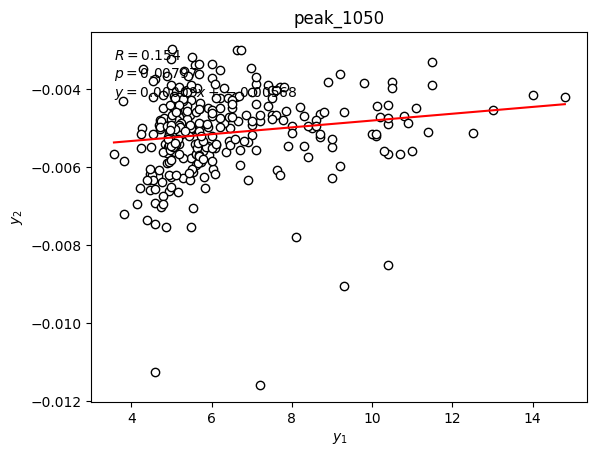

$R = -0.676$
$p < 0.00001$
$y = -0.00053x + -0.00934$


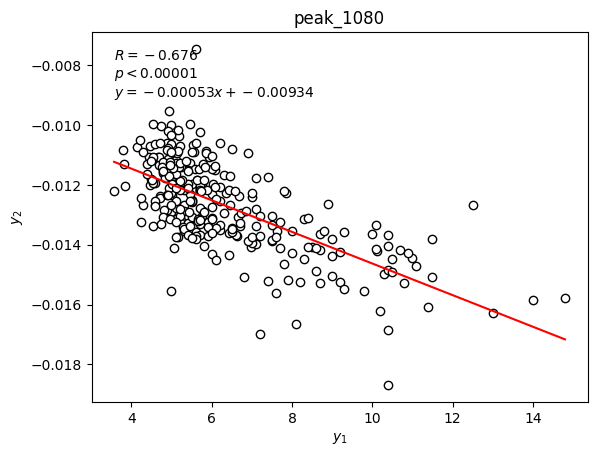

$R = -0.492$
$p < 0.00001$
$y = -0.00032x + -0.00686$


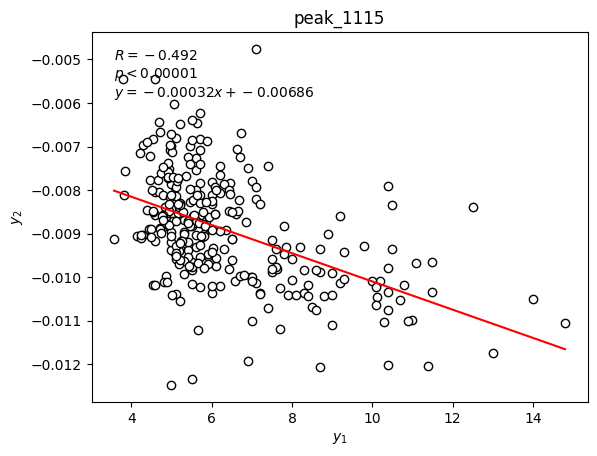

$R = 0.486$
$p < 0.00001$
$y = 0.00035x + -0.00867$


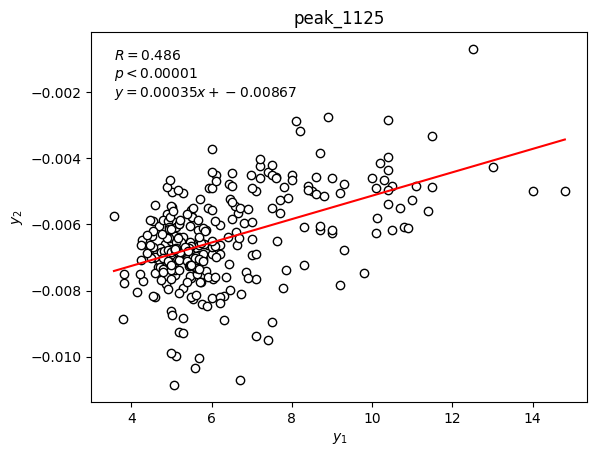

$R = 0.301$
$p < 0.00001$
$y = 0.00015x + -0.01958$


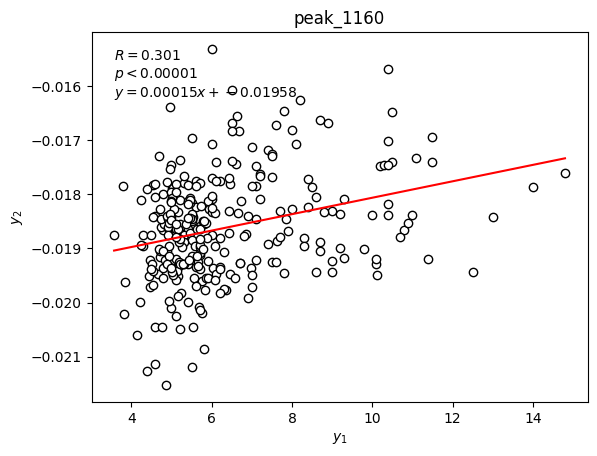

$R = 0.178$
$p = 0.00215$
$y = 0.00007x + -0.02028$


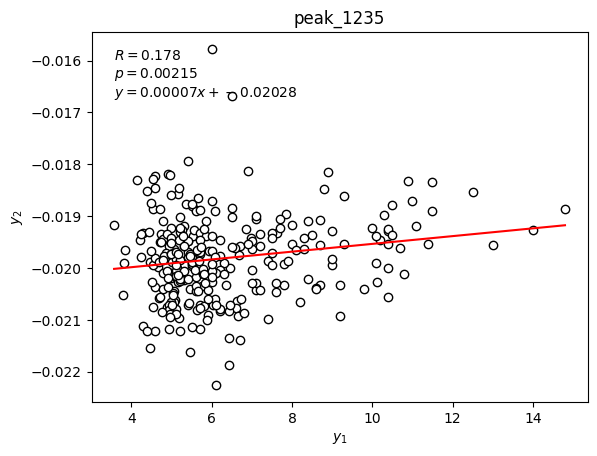

$R = 0.142$
$p = 0.01477$
$y = 0.00004x + -0.01153$


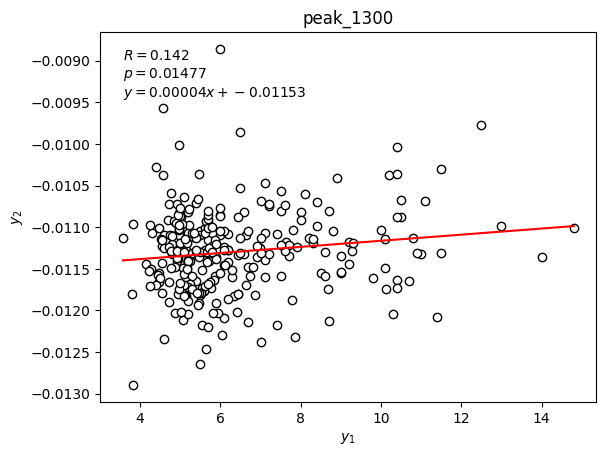

$R = -0.206$
$p = 0.00038$
$y = -0.00007x + 0.00152$


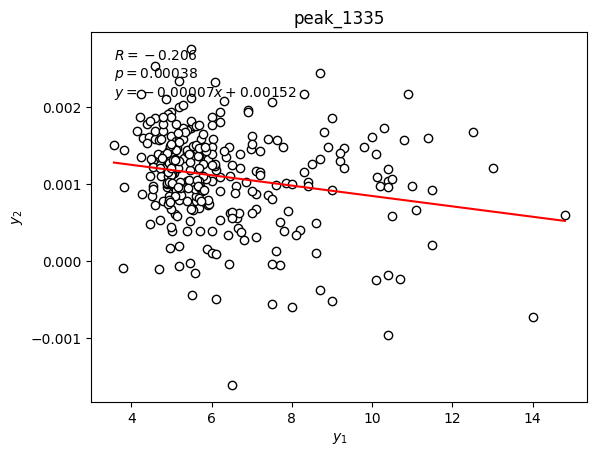

$R = -0.541$
$p < 0.00001$
$y = -0.00043x + 0.01276$


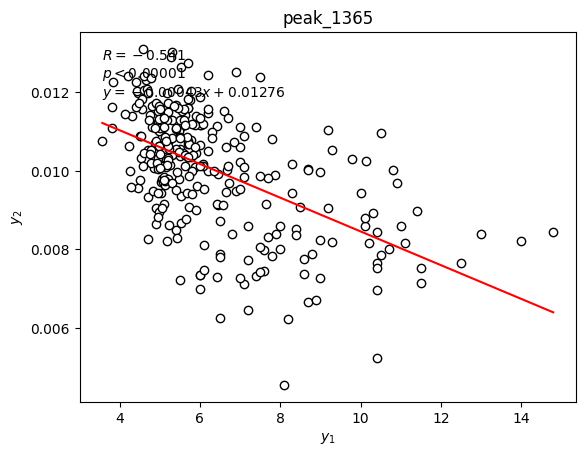

$R = 0.031$
$p = 0.59249$
$y = 0.00003x + -0.04327$


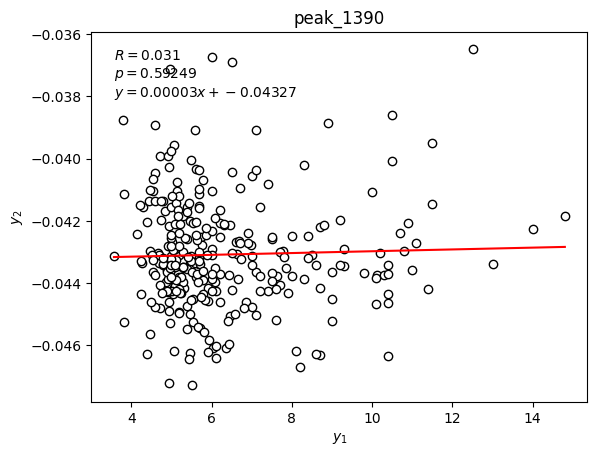

$R = 0.459$
$p < 0.00001$
$y = 0.00034x + -0.02682$


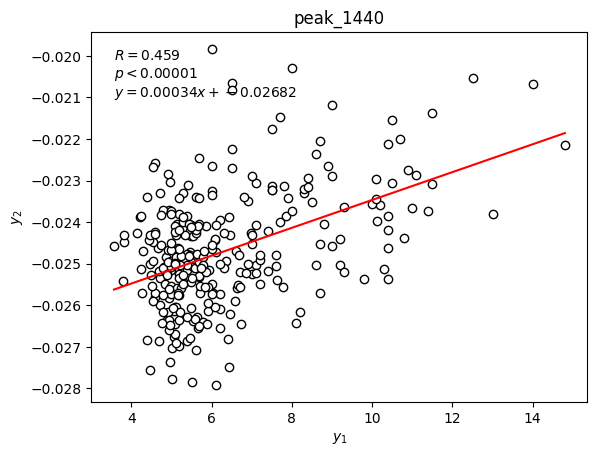

$R = -0.024$
$p = 0.67645$
$y = -0.00004x + -0.04425$


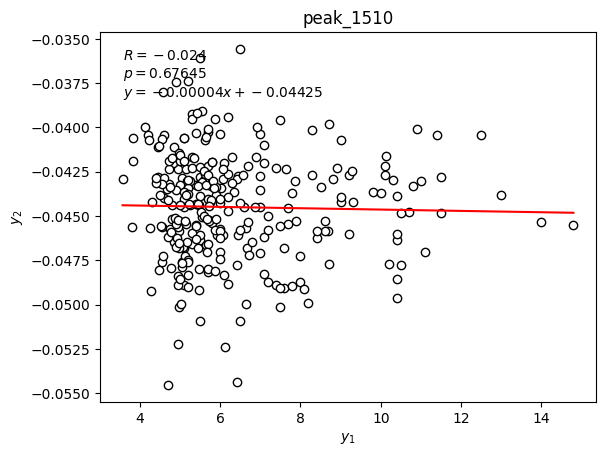

$R = 0.132$
$p = 0.02392$
$y = 0.00008x + 0.01466$


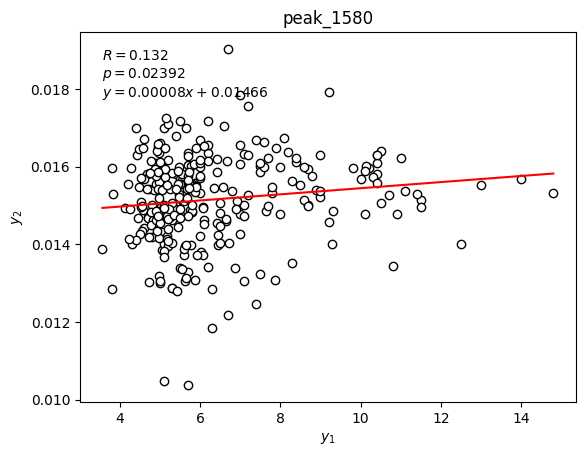

$R = -0.430$
$p < 0.00001$
$y = -0.00090x + -0.00877$


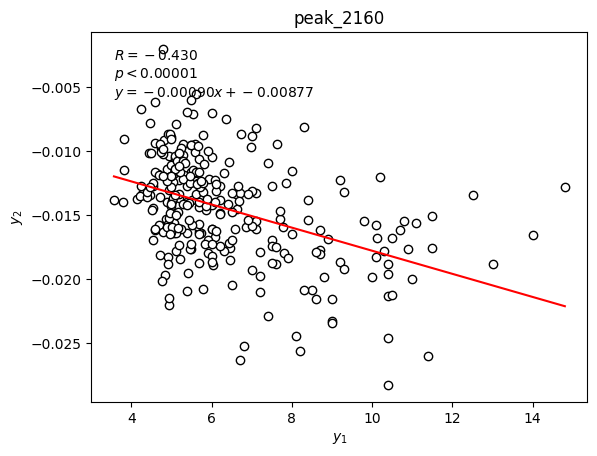

$R = -0.239$
$p = 0.00003$
$y = -0.00017x + -0.00908$


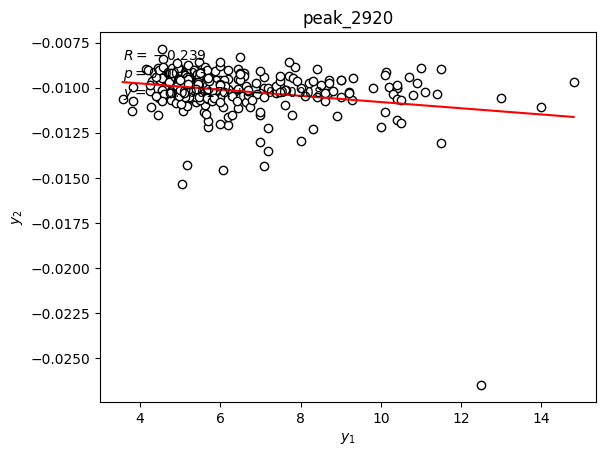

$R = 0.130$
$p = 0.02602$
$y = 0.00005x + -0.01466$


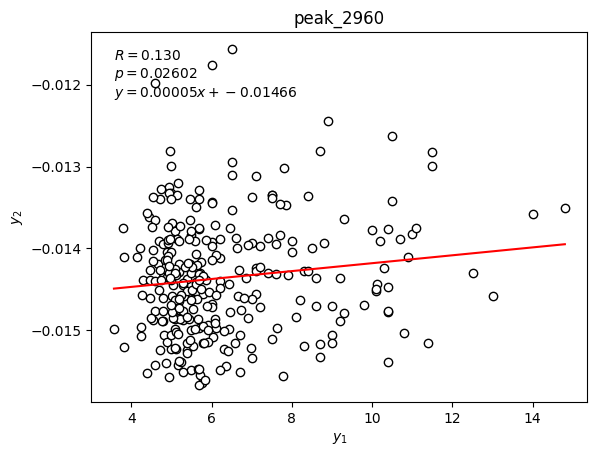

In [114]:
for name, peak in zip(variable_names, variables_list):
    corr_plot(y.to_numpy(), peak)
    plt.title(name)
    plt.show()

$R = 0.676$
$p < 0.00001$
$y = 0.00053x + 0.00934$


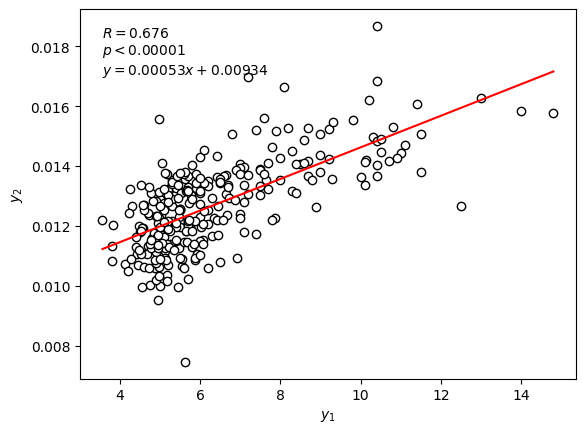

In [115]:
"""
1170–1179
=========
C–H in-plane bending mode of tyrosine, 
C–O ester stretch: cholesterol esters,++stretching (pyr. half-ring) 
asymmetric, C–C, phospholipids, HbO2
"""
corr_plot(y.to_numpy(), -peak_1080.to_numpy())

$R = 0.541$
$p < 0.00001$
$y = 0.00043x + -0.01276$


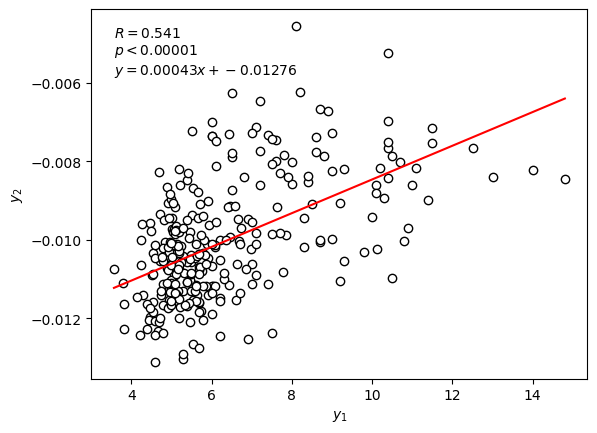

In [116]:
corr_plot(y.to_numpy(), -peak_1365.to_numpy())

R2 of 5 fold CV:  0.4864963472516386


Text(0.5, 1.0, 'not cross-validated')

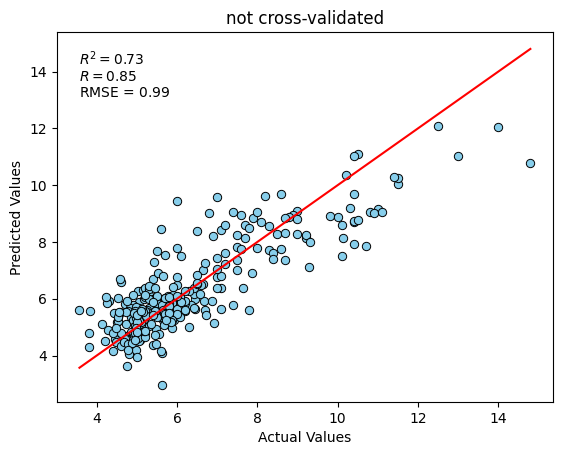

In [117]:
model = LinearRegression()
X_peaks = np.stack(variables_list, axis=1)

#X_peaks = np.stack((peak_1080, peak_2960), axis=1)

y_cv = cross_val_predict(model, X_peaks, y, cv=5)

model.fit(X_peaks, y)

print("R2 of 5 fold CV: ", r2_score(y_cv, y))

y_pred = model.predict(X_peaks)

r_squared = r2_score(y, y_pred)
r = pearsonr(y, y_pred)[0]
rmse = np.sqrt(mean_squared_error(y, y_pred))

plt.scatter(y, y_pred, facecolor='skyblue', edgecolor='k', linewidths=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.text(min(y), max(y), f'$R^2 = {r_squared:.2f}$\n$R = {r:.2f}$\nRMSE = ${rmse:.2f}$', verticalalignment='top')
plt.title("not cross-validated")

┌───────────────────────────┐
│        FIT RESULTS        │
├───────────────────────────┤
│ RMSE = 1.1030             │
│ R2 = 0.6619               │
│ R = 0.8145                │
│ Number of components = 10 │
└───────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='Sample', ylabel='Residuals'>]], dtype=object))

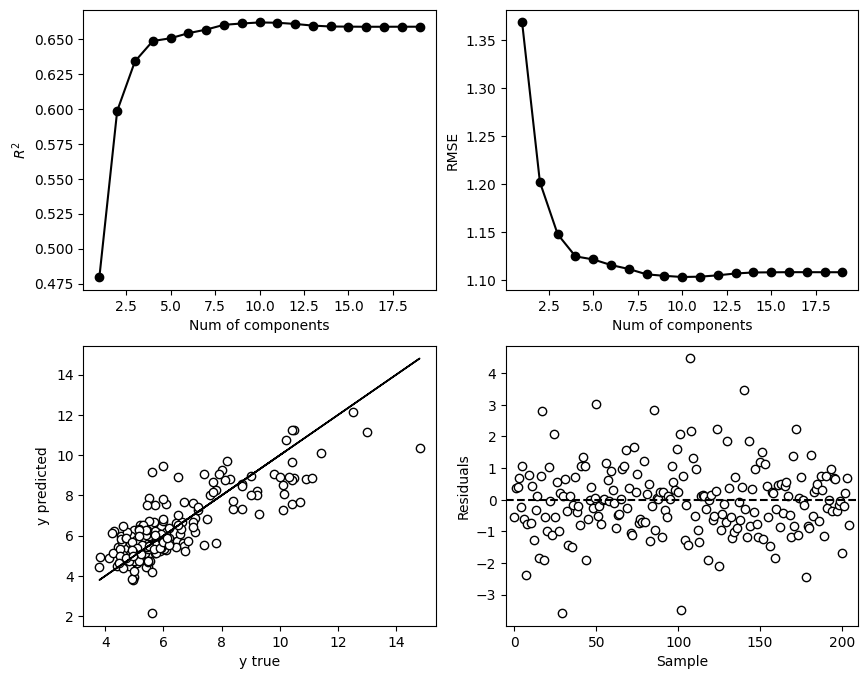

In [118]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None, random_state=24)
categories = discretizer.fit_transform(y.to_numpy().reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_peaks, y, test_size=0.3, stratify=categories, random_state=44)

plot_number_components(X_train, y_train, cv=10)

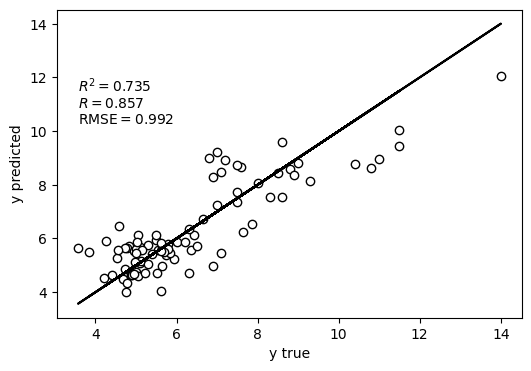

In [119]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)

In [127]:
amide_2 = X.iloc[:, (X.columns > 1525) & (X.columns < 1560)] # Alone is not significant
amide_1 = X.iloc[:, (X.columns > 1625) & (X.columns < 1660)] # p = 0.003 # amide_1 / amide_2 -> p = 0.00002

peak_660 = X.iloc[:, (X.columns > 650) & (X.columns < 670)] # NS
peak_700 = X.iloc[:, (X.columns > 690) & (X.columns < 710)] # NS
peak_740 = X.iloc[:, (X.columns > 735) & (X.columns < 750)] # NS
peak_970 = X.iloc[:, (X.columns > 960) & (X.columns < 975)]
peak_1030 = X.iloc[:, (X.columns > 1025) & (X.columns < 1035)] # p < 0.00001
peak_1050 = X.iloc[:, (X.columns > 1040) & (X.columns < 1060)] # NS
peak_1080 = X.iloc[:, (X.columns > 1075) & (X.columns < 1085)] # p < 0.00001
peak_1115 = X.iloc[:, (X.columns > 1100) & (X.columns < 1110)] # p < 0.00001
peak_1125 = X.iloc[:, (X.columns > 1120) & (X.columns < 1130)] # p < 0.00001
peak_1160 = X.iloc[:, (X.columns > 1155) & (X.columns < 1165)] # p < 0.00001
peak_1235 = X.iloc[:, (X.columns > 1225) & (X.columns < 1245)] # p = 0.00009
peak_1300 = X.iloc[:, (X.columns > 1290) & (X.columns < 1320)] # p = 0.00027
peak_1335 = X.iloc[:, (X.columns > 1330) & (X.columns < 1340)] # p < 0.00001
peak_1365 = X.iloc[:, (X.columns > 1360) & (X.columns < 1370)] # p < 0.00001
peak_1390 = X.iloc[:, (X.columns > 1380) & (X.columns < 1400)] # p = 0.00551
peak_1440 = X.iloc[:, (X.columns > 1435) & (X.columns < 1455)] # p < 0.00001
peak_1510 = X.iloc[:, (X.columns > 1500) & (X.columns < 1520)] # p = 0.00328
peak_1580 = X.iloc[:, (X.columns > 1570) & (X.columns < 1590)] # p < 0.00001
peak_1680 = X.iloc[:, (X.columns > 1675) & (X.columns < 1695)] # NS
peak_2140 = X.iloc[:, (X.columns > 2140) & (X.columns < 2150)] #
peak_2160 = X.iloc[:, (X.columns > 2160) & (X.columns < 2170)] # p < 0.00001
peak_2920 = X.iloc[:, (X.columns > 2920) & (X.columns < 2930)] # p = 0.00023
peak_2960 = X.iloc[:, (X.columns > 2955) & (X.columns < 2965)] # p < 0.00001'
peak_3290 = X.iloc[:, (X.columns > 3260) & (X.columns < 3300)]


X_peaks = pd.concat( (amide_2, peak_1030, peak_1080,
                      peak_1115, peak_1125,
                      peak_1300, peak_1335, peak_1390,
                      peak_1510, peak_2160,
                      peak_3290, peak_2920, peak_2960) , axis=1)

In [128]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None, random_state=24)
categories = discretizer.fit_transform(y.to_numpy().reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_peaks, y, test_size=0.3, stratify=categories, random_state=44)

┌───────────────────────────┐
│        FIT RESULTS        │
├───────────────────────────┤
│ RMSE = 1.0466             │
│ R2 = 0.6956               │
│ R = 0.8383                │
│ Number of components = 10 │
└───────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='Sample', ylabel='Residuals'>]], dtype=object))

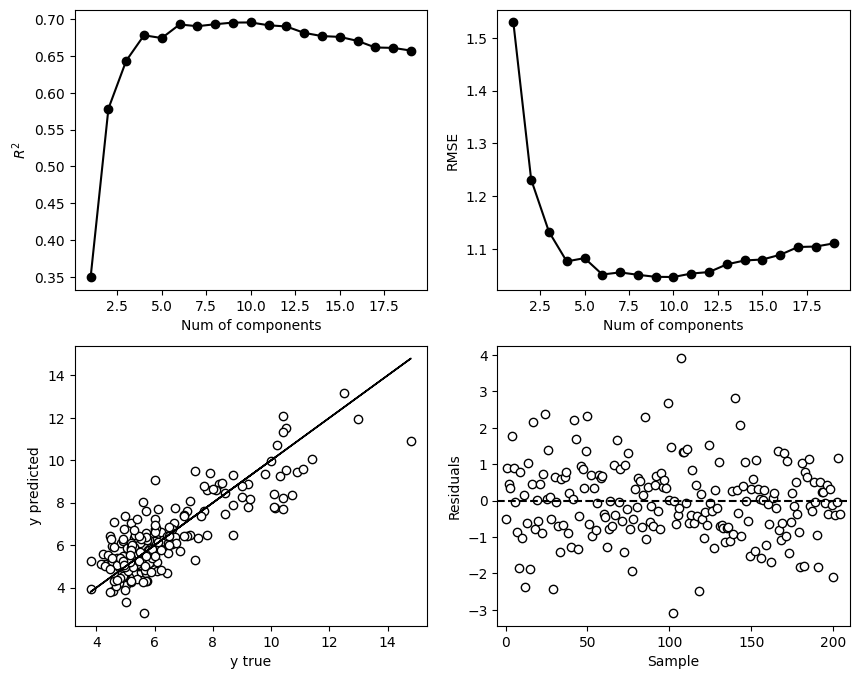

In [129]:
plot_number_components(X_train, y_train, cv=10, number_range=(1, 20))

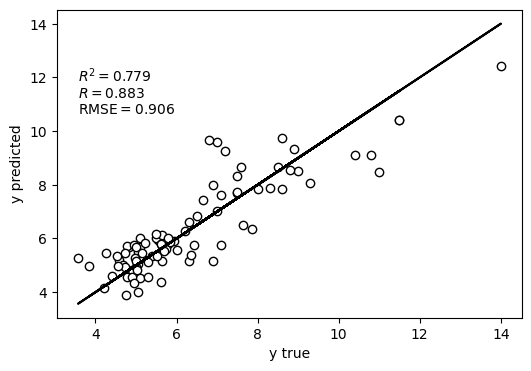

In [130]:
pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)